# 12. 다중 막대 그래프
---
### 다중 막대 그래프의 활용
- 다중 막대 그래프는 여러 데이터 계열을 나란히 배치하여 비교한다.
- 각 항목별로 여러 값을 직접 비교할 수 있어 차이를 명확하게 파악할 수 있다.
- 누적 막대 그래프와 달리 각 데이터를 독립적으로 비교할 수 있다.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정
# matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac 사용자
matplotlib.rcParams['font.size'] = 15 # 폰트 크기 설정
matplotlib.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지


## 데이터 준비
### 예제 데이터
- 학생별 과목 점수 데이터를 준비한다.


In [2]:
# 학생별 과목 점수
students = ['박태근', '이영희', '박지성', '최민아']
국어 = [85, 90, 78, 88]
영어 = [88, 85, 92, 90]
수학 = [90, 88, 85, 92]


## NumPy 배열 활용하기
### np.arange()로 인덱스 생성
- 다중 막대 그래프를 그리려면 각 막대의 위치를 계산해야 한다.
- **np.arange()** 를 사용하여 연속된 숫자 배열을 생성한다.


In [4]:
num = len(students)
index = np.arange(num)

index

array([0, 1, 2, 3])

## 다중 막대 그래프 그리기
### 막대 위치 계산하기
- 막대의 너비(width)를 설정하고, 각 막대의 위치를 조정하여 나란히 배치한다.
- 첫 번째 막대는 왼쪽에, 두 번째는 중앙에, 세 번째는 오른쪽에 배치한다.


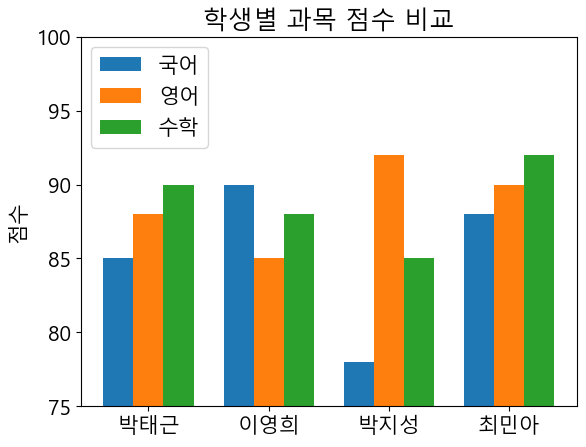

In [17]:
num = len(students)
index = np.arange(num) # [0, 1, 2, 3] -> students만큼의 x축 좌표를 얻기 위함

w = 0.25
plt.bar(index-w, 국어, width=w, label='국어')
plt.bar(index, 영어, width=w, label='영어')
plt.bar(index+w, 수학, width=w, label='수학')

plt.title('학생별 과목 점수 비교')
plt.ylabel('점수')
plt.xticks(index, students)
plt.ylim(75, 100)
plt.legend(loc='upper left')
plt.show()


### 그래프 크기 조정
- **figure(figsize=(width, height))** 로 그래프 크기를 조정할 수 있다.
- 데이터가 많을 때 그래프를 크게 만들면 더 보기 좋다.


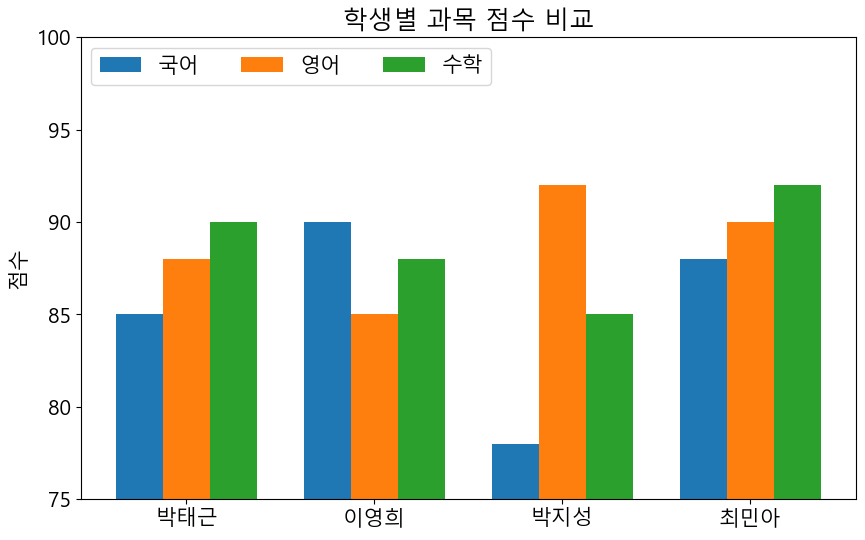

In [21]:
num = len(students)
index = np.arange(num) # [0, 1, 2, 3] -> students만큼의 x축 좌표를 얻기 위함

w = 0.25

plt.figure(figsize=(10,6)) # 사이즈 조절 (너비, 높이)

plt.bar(index-w, 국어, width=w, label='국어')
plt.bar(index, 영어, width=w, label='영어')
plt.bar(index+w, 수학, width=w, label='수학')

plt.title('학생별 과목 점수 비교')
plt.ylabel('점수')
plt.xticks(index, students)
plt.ylim(75, 100)
plt.legend(loc='upper left', ncol=3)
plt.show()


## 실전 예제: 고객 데이터 시각화
### 도시별 평균 데이터 비교
- customers3.csv 파일의 데이터를 사용하여 도시별 평균을 비교해보자.


In [22]:
# 고객 데이터 불러오기
df = pd.read_csv('../02_Pandas/data/customers3.csv', encoding='utf-8')

# 도시별 평균 계산
city_avg = df.groupby('거주도시')[['나이', '평균구매액(만원)', '고객만족도(점)']].mean()
city_avg


,나이,평균구매액(만원),고객만족도(점)
거주도시,,,
구로,28.0,88.0,94.0
시흥,31.0,82.5,81.5
안양,30.0,92.0,88.0
울산,35.0,110.0,91.0
일산,29.0,125.0,96.0
창원,40.0,105.0,82.0
파주,31.0,65.0,77.0


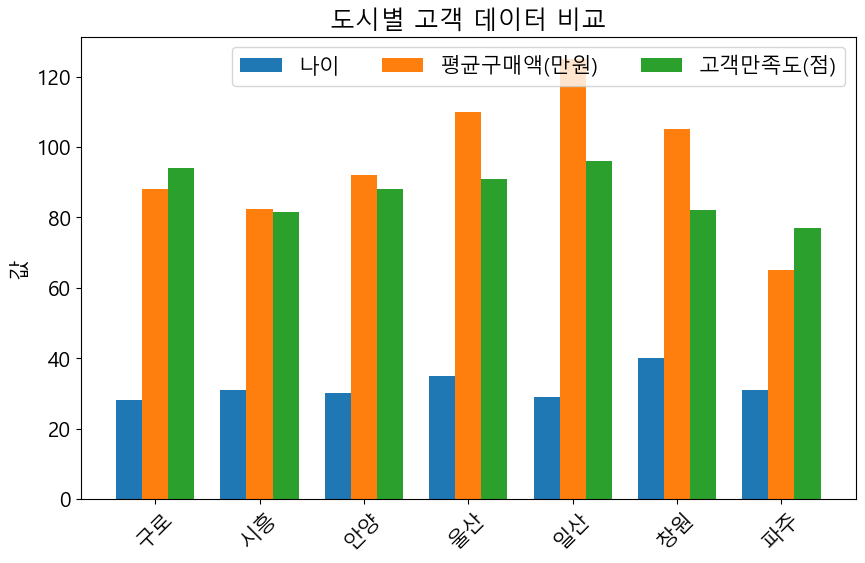

In [39]:
cities = city_avg.index
numbers = len(cities)

plt.figure(figsize=(10,6)) # 사이즈 조절 (너비, 높이)

index = np.arange(numbers) # [0,1,2,3,4,5,6] 7개
w = 0.25

plt.bar(index - w, city_avg['나이'], width = w, label='나이')
plt.bar(index, city_avg['평균구매액(만원)'], width = w, label='평균구매액(만원)')
plt.bar(index + w, city_avg['고객만족도(점)'], width = w, label='고객만족도(점)')

plt.xticks(index, cities, rotation=45)
plt.ylabel('값')
plt.title("도시별 고객 데이터 비교")
plt.legend(loc='upper right', ncol=3)